In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
dataset = pd.read_csv('/home/urwa/Documents/side_projects/urban/data/featureData/penn.csv')

In [4]:
def train(model, optimiser, scheduler, criterion,epochs = 500):
    losses = []
    # Main optimization loop
    for t in range(epochs):

        optimiser.zero_grad()

        y_predicted = model(X_train)

        current_loss = criterion(y_predicted, y_train)

        current_loss.backward()

        optimiser.step()

        print(f"t = {t}, loss = {current_loss}")

        losses.append(current_loss)

        scheduler.step()    
    return losses,model

In [5]:
dataset.shape

(8757, 1045)

In [6]:
dataset.head(3)

,Date,Hour,1,10,100,101,102,106,107,108,...,91_lag_3,92_lag_3,93_lag_3,94_lag_3,95_lag_3,96_lag_3,97_lag_3,98_lag_3,99_lag_3,arrival_lag_3
0,2018-01-01,3,5,0,3,0,0,0,26,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-01,4,3,0,7,0,0,0,8,0,...,0.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,1.0
2,2018-01-01,5,6,0,1,1,0,2,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0


In [7]:
class Linear_Net(nn.Module):
    def __init__(self, in_features,out_features):
        super(Linear_Net, self).__init__()
        self.fc1 = nn.Linear(in_features=in_features, out_features=out_features, bias=True)
        
    def forward(self, x):
        return self.fc1(x)

In [8]:
class Simple_Net(nn.Module):
    def __init__(self, in_features,out_features):
        super(Simple_Net, self).__init__()
        self.fc1 = nn.Linear(in_features=in_features, out_features=1000, bias=True)
        self.fc2 = nn.Linear(in_features=1000, out_features=500, bias=True)
        self.fc3 = nn.Linear(in_features=500, out_features=out_features, bias=True)
        
    def forward(self, x):
        y = F.relu(self.fc1(x))
        y = F.relu(self.fc2(y))
        y = self.fc3(y)
        return y

In [9]:
lag_columns = [c for c in dataset.columns if 'lag' in c]
len(lag_columns)

774

In [10]:
DateColumns = ['Date']

ext_columns = ['Dow', 'arrival','maxtemp', 'mintemp', 'avgtemp', 'departure', 'hdd',
       'cdd', 'participation', 'newsnow', 'snowdepth', 'ifSnow']

targetColumns = [c for c in dataset.columns if c not in ext_columns and \
                c not in DateColumns and c not in lag_columns and c != 'Hour']
len(targetColumns)

257

In [11]:
features_cols = [c for c in dataset.columns if c not in targetColumns and c not in DateColumns]
len(features_cols)

787

In [12]:
x = dataset[features_cols].values
y = dataset[targetColumns].values

In [13]:
# scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# scaler_x.fit(x)
# scaler_y.fit(y)

# x = scaler_x.transform(x)
# y = scaler_y.transform(y)

In [14]:
x = torch.tensor(x).float().to(device)
print(x.shape)
y = torch.tensor(y).float().to(device)
print(y.shape)

torch.Size([8757, 787])
torch.Size([8757, 257])


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

t = 0, loss = 5.113589763641357
t = 1, loss = 6.196808338165283
t = 2, loss = 5.886536598205566
t = 3, loss = 6.481637001037598
t = 4, loss = 5.989182472229004
t = 5, loss = 6.538891792297363
t = 6, loss = 6.008185863494873
t = 7, loss = 6.518050670623779
t = 8, loss = 6.0126729011535645
t = 9, loss = 6.5072245597839355
t = 10, loss = 6.020452499389648
t = 11, loss = 6.504340171813965
t = 12, loss = 6.030454158782959
t = 13, loss = 6.499886512756348
t = 14, loss = 6.034731864929199
t = 15, loss = 6.4941887855529785
t = 16, loss = 6.036081790924072
t = 17, loss = 6.486876964569092
t = 18, loss = 6.042609214782715
t = 19, loss = 6.484394073486328
t = 20, loss = 6.049984455108643
t = 21, loss = 6.483949661254883
t = 22, loss = 6.054821968078613
t = 23, loss = 6.479799270629883
t = 24, loss = 6.055909633636475
t = 25, loss = 6.473097324371338
t = 26, loss = 6.058071613311768
t = 27, loss = 6.468724727630615
t = 28, loss = 6.06025505065918
t = 29, loss = 6.463531017303467
t = 30, loss = 6.0

t = 338, loss = 1.3660415410995483
t = 339, loss = 1.3660308122634888
t = 340, loss = 1.3660202026367188
t = 341, loss = 1.3660094738006592
t = 342, loss = 1.3659987449645996
t = 343, loss = 1.3659878969192505
t = 344, loss = 1.3659772872924805
t = 345, loss = 1.365966558456421
t = 346, loss = 1.3659558296203613
t = 347, loss = 1.3659451007843018
t = 348, loss = 1.3659344911575317
t = 349, loss = 1.3659237623214722
t = 350, loss = 1.3659130334854126
t = 351, loss = 1.3659021854400635
t = 352, loss = 1.3658915758132935
t = 353, loss = 1.3658809661865234
t = 354, loss = 1.3658701181411743
t = 355, loss = 1.3658595085144043
t = 356, loss = 1.3658487796783447
t = 357, loss = 1.3658381700515747
t = 358, loss = 1.3658273220062256
t = 359, loss = 1.3658167123794556
t = 360, loss = 1.3658061027526855
t = 361, loss = 1.3657952547073364
t = 362, loss = 1.365784764289856
t = 363, loss = 1.3657740354537964
t = 364, loss = 1.3657631874084473
t = 365, loss = 1.3657526969909668
t = 366, loss = 1.3657

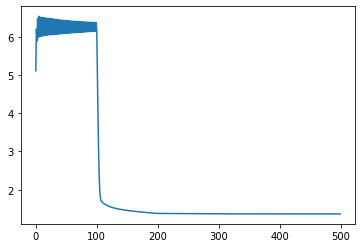

In [16]:
in_feat = len(features_cols)
out_feat = len(targetColumns)
model = Linear_Net(in_features=in_feat ,out_features=out_feat).to(device)

criterion = nn.L1Loss()
optimiser = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.StepLR(optimiser, step_size=100, gamma=0.1)

losses,model = train(model, optimiser, scheduler, criterion, epochs = 500)

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_train = model(X_train)

plt.plot(losses)


train_r2 = r2_score(y_train.detach().cpu().numpy(), y_pred_train.detach().cpu().numpy(), multioutput='variance_weighted')
test_r2=r2_score(y_test.detach().cpu().numpy(), y_pred_test.detach().cpu().numpy(), multioutput='variance_weighted')

print("Training R2: ",train_r2)
print("Test R2: ",test_r2)


t = 0, loss = 2.5655782222747803
t = 1, loss = 2.2825512886047363
t = 2, loss = 2.2152745723724365
t = 3, loss = 2.168558120727539
t = 4, loss = 2.1278562545776367
t = 5, loss = 2.1023380756378174
t = 6, loss = 2.0566565990448
t = 7, loss = 2.0189907550811768
t = 8, loss = 1.9235605001449585
t = 9, loss = 1.8491952419281006
t = 10, loss = 1.7690478563308716
t = 11, loss = 1.7313916683197021
t = 12, loss = 1.673329472541809
t = 13, loss = 1.6365251541137695
t = 14, loss = 1.5801966190338135
t = 15, loss = 1.5730767250061035
t = 16, loss = 1.540291666984558
t = 17, loss = 1.5311719179153442
t = 18, loss = 1.5480622053146362
t = 19, loss = 1.5405449867248535
t = 20, loss = 1.466984748840332
t = 21, loss = 1.4682649374008179
t = 22, loss = 1.4678882360458374
t = 23, loss = 1.4067209959030151
t = 24, loss = 1.4065113067626953
t = 25, loss = 1.3920600414276123
t = 26, loss = 1.3464971780776978
t = 27, loss = 1.3488537073135376
t = 28, loss = 1.336113691329956
t = 29, loss = 1.31768798828125


t = 261, loss = 0.9222397804260254
t = 262, loss = 0.9222249984741211
t = 263, loss = 0.9222103357315063
t = 264, loss = 0.9221956729888916
t = 265, loss = 0.9221809506416321
t = 266, loss = 0.9221662878990173
t = 267, loss = 0.9221516847610474
t = 268, loss = 0.9221370220184326
t = 269, loss = 0.9221222996711731
t = 270, loss = 0.9221077561378479
t = 271, loss = 0.9220931529998779
t = 272, loss = 0.9220783710479736
t = 273, loss = 0.9220637679100037
t = 274, loss = 0.9220491647720337
t = 275, loss = 0.9220345616340637
t = 276, loss = 0.9220199584960938
t = 277, loss = 0.9220053553581238
t = 278, loss = 0.9219907522201538
t = 279, loss = 0.9219761490821838
t = 280, loss = 0.9219615459442139
t = 281, loss = 0.9219469428062439
t = 282, loss = 0.9219323992729187
t = 283, loss = 0.9219179153442383
t = 284, loss = 0.9219033122062683
t = 285, loss = 0.9218887090682983
t = 286, loss = 0.9218742847442627
t = 287, loss = 0.9218597412109375
t = 288, loss = 0.9218451976776123
t = 289, loss = 0.92

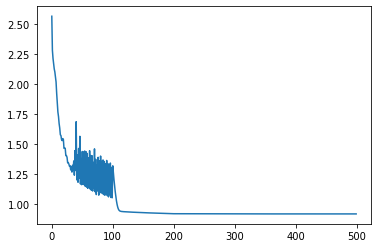

In [17]:
in_feat = len(features_cols)
out_feat = len(targetColumns)
model = Simple_Net(in_features=in_feat ,out_features=out_feat).to(device)

criterion = nn.L1Loss()
optimiser = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.StepLR(optimiser, step_size=100, gamma=0.1)

losses,model = train(model, optimiser, scheduler, criterion, epochs = 500)

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_train = model(X_train)

plt.plot(losses)


train_r2 = r2_score(y_train.detach().cpu().numpy(), y_pred_train.detach().cpu().numpy(), multioutput='variance_weighted')
test_r2=r2_score(y_test.detach().cpu().numpy(), y_pred_test.detach().cpu().numpy(), multioutput='variance_weighted')

print("Training R2: ",train_r2)
print("Test R2: ",test_r2)
